In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import sklearn
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [63]:
data = pd.read_csv("musk_csv.csv")
data.tail(5)

,ID,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
6593,6594,NON-MUSK-jp13,jp13_2+5,51,-123,-23,-108,-117,134,-160,...,-66,164,-14,-29,107,171,-44,-115,118,0
6594,6595,NON-MUSK-jp13,jp13_2+6,44,-104,-19,-105,-117,142,-165,...,-51,166,-9,150,129,158,-66,-144,-5,0
6595,6596,NON-MUSK-jp13,jp13_2+7,44,-102,-19,-104,-117,72,-165,...,90,117,-8,150,130,159,-66,-144,-6,0
6596,6597,NON-MUSK-jp13,jp13_2+8,51,-121,-23,-106,-117,63,-161,...,86,99,-14,-31,106,171,-44,-116,117,0
6597,6598,NON-MUSK-jp13,jp13_2+9,51,-122,-23,-106,-117,190,-161,...,40,124,-14,-30,107,171,-44,-115,118,0


In [64]:
data.drop(["ID", "molecule_name" ,"conformation_name"],axis=1,inplace=True)
data

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,46,-108,-60,-69,-117,49,38,-161,-8,5,...,-308,52,-7,39,126,156,-50,-112,96,1
1,41,-188,-145,22,-117,-6,57,-171,-39,-100,...,-59,-2,52,103,136,169,-61,-136,79,1
2,46,-194,-145,28,-117,73,57,-168,-39,-22,...,-134,-154,57,143,142,165,-67,-145,39,1
3,41,-188,-145,22,-117,-7,57,-170,-39,-99,...,-60,-4,52,104,136,168,-60,-135,80,1
4,41,-188,-145,22,-117,-7,57,-170,-39,-99,...,-60,-4,52,104,137,168,-60,-135,80,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6593,51,-123,-23,-108,-117,134,-160,82,-230,-28,...,-66,164,-14,-29,107,171,-44,-115,118,0
6594,44,-104,-19,-105,-117,142,-165,68,-225,-32,...,-51,166,-9,150,129,158,-66,-144,-5,0
6595,44,-102,-19,-104,-117,72,-165,65,-219,-12,...,90,117,-8,150,130,159,-66,-144,-6,0
6596,51,-121,-23,-106,-117,63,-161,79,-224,-30,...,86,99,-14,-31,106,171,-44,-116,117,0


In [65]:
X = data.drop(["class"],axis=1)
Y = data["class"]

In [66]:
X = np.array(X)
Y= np.array(Y)
print(X.shape)
print(Y.shape)
x_train,x_test,y_train,y_test = train_test_split(X , Y , test_size = 0.2)
x_train.shape,x_test.shape

(6598, 166)
(6598,)


((5278, 166), (1320, 166))

In [67]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(166,activation='sigmoid'))
model.add(tf.keras.layers.Dense(300, activation='sigmoid'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [68]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=8,validation_split=0.2, shuffle=True)


Train on 4222 samples, validate on 1056 samples
Epoch 1/8
4222/4222 [==============================] - 3s 784us/sample - loss: 0.4372 - accuracy: 0.8278 - val_loss: 0.3300 - val_accuracy: 0.8532
Epoch 2/8
4222/4222 [==============================] - 0s 106us/sample - loss: 0.2942 - accuracy: 0.8811 - val_loss: 0.2576 - val_accuracy: 0.9100
Epoch 3/8
4222/4222 [==============================] - 0s 105us/sample - loss: 0.2515 - accuracy: 0.9057 - val_loss: 0.2283 - val_accuracy: 0.9214
Epoch 4/8
4222/4222 [==============================] - 0s 104us/sample - loss: 0.2238 - accuracy: 0.9169 - val_loss: 0.2064 - val_accuracy: 0.9233
Epoch 5/8
4222/4222 [==============================] - 0s 105us/sample - loss: 0.2219 - accuracy: 0.9143 - val_loss: 0.2101 - val_accuracy: 0.9280
Epoch 6/8
4222/4222 [==============================] - 0s 104us/sample - loss: 0.2065 - accuracy: 0.9254 - val_loss: 0.2164 - val_accuracy: 0.9176
Epoch 7/8
4222/4222 [==============================] - 0s 106us/sample

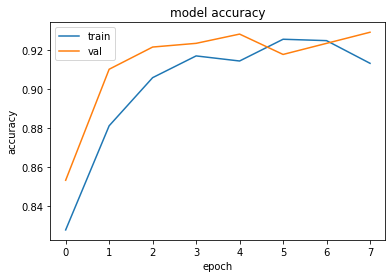

In [69]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

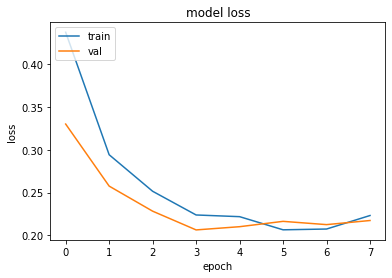

In [70]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [71]:
model.evaluate(x_test,y_test,verbose=2)

1320/1 - 1s - loss: 0.1803 - accuracy: 0.9280


[0.21945151632482354, 0.9280303]

In [72]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=500,validation_split=0.2, shuffle=True)

Train on 4222 samples, validate on 1056 samples
Epoch 1/500
4222/4222 [==============================] - 3s 807us/sample - loss: 0.2012 - accuracy: 0.9199 - val_loss: 0.2080 - val_accuracy: 0.9252
Epoch 2/500
4222/4222 [==============================] - 1s 121us/sample - loss: 0.1794 - accuracy: 0.9308 - val_loss: 0.1974 - val_accuracy: 0.9299
Epoch 3/500
4222/4222 [==============================] - 1s 143us/sample - loss: 0.1803 - accuracy: 0.9285 - val_loss: 0.2018 - val_accuracy: 0.9233
Epoch 4/500
4222/4222 [==============================] - 1s 152us/sample - loss: 0.1767 - accuracy: 0.9358 - val_loss: 0.1726 - val_accuracy: 0.9422
Epoch 5/500
4222/4222 [==============================] - 1s 121us/sample - loss: 0.1619 - accuracy: 0.9398 - val_loss: 0.1836 - val_accuracy: 0.9394
Epoch 6/500
4222/4222 [==============================] - 1s 122us/sample - loss: 0.1767 - accuracy: 0.9342 - val_loss: 0.1806 - val_accuracy: 0.9366
Epoch 7/500
4222/4222 [==============================] - 1

4222/4222 [==============================] - 0s 100us/sample - loss: 0.1356 - accuracy: 0.9474 - val_loss: 0.1625 - val_accuracy: 0.9451
Epoch 56/500
4222/4222 [==============================] - 0s 102us/sample - loss: 0.1308 - accuracy: 0.9469 - val_loss: 0.1467 - val_accuracy: 0.9451
Epoch 57/500
4222/4222 [==============================] - 0s 100us/sample - loss: 0.1315 - accuracy: 0.9512 - val_loss: 0.1513 - val_accuracy: 0.9451
Epoch 58/500
4222/4222 [==============================] - 0s 99us/sample - loss: 0.1332 - accuracy: 0.9467 - val_loss: 0.1538 - val_accuracy: 0.9347
Epoch 59/500
4222/4222 [==============================] - 0s 100us/sample - loss: 0.1380 - accuracy: 0.9455 - val_loss: 0.1829 - val_accuracy: 0.9347
Epoch 60/500
4222/4222 [==============================] - 0s 112us/sample - loss: 0.1356 - accuracy: 0.9488 - val_loss: 0.1591 - val_accuracy: 0.9432
Epoch 61/500
4222/4222 [==============================] - 0s 99us/sample - loss: 0.1399 - accuracy: 0.9467 - val_l

4222/4222 [==============================] - 0s 101us/sample - loss: 0.1311 - accuracy: 0.9441 - val_loss: 0.1466 - val_accuracy: 0.9460
Epoch 110/500
4222/4222 [==============================] - 0s 105us/sample - loss: 0.1251 - accuracy: 0.9505 - val_loss: 0.1448 - val_accuracy: 0.9432
Epoch 111/500
4222/4222 [==============================] - 0s 105us/sample - loss: 0.1223 - accuracy: 0.9488 - val_loss: 0.1320 - val_accuracy: 0.9564
Epoch 112/500
4222/4222 [==============================] - 0s 111us/sample - loss: 0.1124 - accuracy: 0.9545 - val_loss: 0.1239 - val_accuracy: 0.9545
Epoch 113/500
4222/4222 [==============================] - 0s 110us/sample - loss: 0.1096 - accuracy: 0.9531 - val_loss: 0.1405 - val_accuracy: 0.9545
Epoch 114/500
4222/4222 [==============================] - 0s 117us/sample - loss: 0.1104 - accuracy: 0.9550 - val_loss: 0.1338 - val_accuracy: 0.9555
Epoch 115/500
4222/4222 [==============================] - 1s 122us/sample - loss: 0.1040 - accuracy: 0.9588

4222/4222 [==============================] - 1s 126us/sample - loss: 0.1063 - accuracy: 0.9616 - val_loss: 0.1587 - val_accuracy: 0.9413
Epoch 164/500
4222/4222 [==============================] - 1s 137us/sample - loss: 0.1155 - accuracy: 0.9557 - val_loss: 0.1757 - val_accuracy: 0.9261
Epoch 165/500
4222/4222 [==============================] - 1s 131us/sample - loss: 0.1088 - accuracy: 0.9595 - val_loss: 0.1461 - val_accuracy: 0.9451
Epoch 166/500
4222/4222 [==============================] - 1s 128us/sample - loss: 0.1033 - accuracy: 0.9635 - val_loss: 0.1428 - val_accuracy: 0.9517
Epoch 167/500
4222/4222 [==============================] - 1s 125us/sample - loss: 0.1046 - accuracy: 0.9609 - val_loss: 0.1453 - val_accuracy: 0.9545
Epoch 168/500
4222/4222 [==============================] - 1s 195us/sample - loss: 0.1015 - accuracy: 0.9623 - val_loss: 0.1410 - val_accuracy: 0.9489
Epoch 169/500
4222/4222 [==============================] - 1s 162us/sample - loss: 0.1153 - accuracy: 0.9569

4222/4222 [==============================] - 1s 148us/sample - loss: 0.0942 - accuracy: 0.9609 - val_loss: 0.1303 - val_accuracy: 0.9470
Epoch 218/500
4222/4222 [==============================] - 1s 142us/sample - loss: 0.0913 - accuracy: 0.9609 - val_loss: 0.1737 - val_accuracy: 0.9460
Epoch 219/500
4222/4222 [==============================] - 1s 143us/sample - loss: 0.1023 - accuracy: 0.9526 - val_loss: 0.1637 - val_accuracy: 0.9299
Epoch 220/500
4222/4222 [==============================] - 1s 165us/sample - loss: 0.1128 - accuracy: 0.9581 - val_loss: 0.1387 - val_accuracy: 0.9451
Epoch 221/500
4222/4222 [==============================] - 1s 158us/sample - loss: 0.1027 - accuracy: 0.9543 - val_loss: 0.1400 - val_accuracy: 0.9479
Epoch 222/500
4222/4222 [==============================] - 1s 132us/sample - loss: 0.0961 - accuracy: 0.9607 - val_loss: 0.1384 - val_accuracy: 0.9508
Epoch 223/500
4222/4222 [==============================] - 1s 130us/sample - loss: 0.0965 - accuracy: 0.9619

4222/4222 [==============================] - 1s 155us/sample - loss: 0.0754 - accuracy: 0.9758 - val_loss: 0.1185 - val_accuracy: 0.9602
Epoch 272/500
4222/4222 [==============================] - 1s 146us/sample - loss: 0.0786 - accuracy: 0.9702 - val_loss: 0.1356 - val_accuracy: 0.9508
Epoch 273/500
4222/4222 [==============================] - 1s 190us/sample - loss: 0.0786 - accuracy: 0.9685 - val_loss: 0.1806 - val_accuracy: 0.9479
Epoch 274/500
4222/4222 [==============================] - 1s 191us/sample - loss: 0.0956 - accuracy: 0.9690 - val_loss: 0.1052 - val_accuracy: 0.9602
Epoch 275/500
4222/4222 [==============================] - 1s 154us/sample - loss: 0.0745 - accuracy: 0.9761 - val_loss: 0.1032 - val_accuracy: 0.9621
Epoch 276/500
4222/4222 [==============================] - 1s 155us/sample - loss: 0.0707 - accuracy: 0.9725 - val_loss: 0.1286 - val_accuracy: 0.9555
Epoch 277/500
4222/4222 [==============================] - 1s 143us/sample - loss: 0.0790 - accuracy: 0.9704

4222/4222 [==============================] - 1s 168us/sample - loss: 0.0927 - accuracy: 0.9711 - val_loss: 0.1420 - val_accuracy: 0.9593
Epoch 326/500
4222/4222 [==============================] - 1s 142us/sample - loss: 0.0984 - accuracy: 0.9652 - val_loss: 0.1266 - val_accuracy: 0.9640
Epoch 327/500
4222/4222 [==============================] - 1s 143us/sample - loss: 0.0808 - accuracy: 0.9699 - val_loss: 0.1194 - val_accuracy: 0.9612
Epoch 328/500
4222/4222 [==============================] - 1s 141us/sample - loss: 0.0727 - accuracy: 0.9728 - val_loss: 0.1056 - val_accuracy: 0.9669
Epoch 329/500
4222/4222 [==============================] - 1s 139us/sample - loss: 0.0710 - accuracy: 0.9739 - val_loss: 0.1118 - val_accuracy: 0.9593
Epoch 330/500
4222/4222 [==============================] - 1s 147us/sample - loss: 0.0932 - accuracy: 0.9690 - val_loss: 0.1302 - val_accuracy: 0.9583
Epoch 331/500
4222/4222 [==============================] - 1s 141us/sample - loss: 0.1019 - accuracy: 0.9654

4222/4222 [==============================] - 1s 177us/sample - loss: 0.0703 - accuracy: 0.9730 - val_loss: 0.1134 - val_accuracy: 0.9593
Epoch 380/500
4222/4222 [==============================] - 1s 168us/sample - loss: 0.0647 - accuracy: 0.9718 - val_loss: 0.1135 - val_accuracy: 0.9640
Epoch 381/500
4222/4222 [==============================] - 1s 154us/sample - loss: 0.0770 - accuracy: 0.9718 - val_loss: 0.1138 - val_accuracy: 0.9640
Epoch 382/500
4222/4222 [==============================] - 1s 150us/sample - loss: 0.0754 - accuracy: 0.9713 - val_loss: 0.1126 - val_accuracy: 0.9612
Epoch 383/500
4222/4222 [==============================] - 1s 151us/sample - loss: 0.0773 - accuracy: 0.9657 - val_loss: 0.1075 - val_accuracy: 0.9621
Epoch 384/500
4222/4222 [==============================] - 1s 165us/sample - loss: 0.0685 - accuracy: 0.9761 - val_loss: 0.1070 - val_accuracy: 0.9678
Epoch 385/500
4222/4222 [==============================] - 1s 170us/sample - loss: 0.0679 - accuracy: 0.9780

4222/4222 [==============================] - 1s 152us/sample - loss: 0.0897 - accuracy: 0.9718 - val_loss: 0.1296 - val_accuracy: 0.9669
Epoch 434/500
4222/4222 [==============================] - 1s 185us/sample - loss: 0.0878 - accuracy: 0.9723 - val_loss: 0.1368 - val_accuracy: 0.9602
Epoch 435/500
4222/4222 [==============================] - 1s 201us/sample - loss: 0.1070 - accuracy: 0.9619 - val_loss: 0.1400 - val_accuracy: 0.9593
Epoch 436/500
4222/4222 [==============================] - 1s 181us/sample - loss: 0.1354 - accuracy: 0.9586 - val_loss: 0.1676 - val_accuracy: 0.9498
Epoch 437/500
4222/4222 [==============================] - 1s 217us/sample - loss: 0.1508 - accuracy: 0.9420 - val_loss: 0.1435 - val_accuracy: 0.9489
Epoch 438/500
4222/4222 [==============================] - 1s 209us/sample - loss: 0.1308 - accuracy: 0.9465 - val_loss: 0.1601 - val_accuracy: 0.9356
Epoch 439/500
4222/4222 [==============================] - 1s 176us/sample - loss: 0.1162 - accuracy: 0.9581

4222/4222 [==============================] - 1s 154us/sample - loss: 0.0928 - accuracy: 0.9638 - val_loss: 0.1159 - val_accuracy: 0.9602
Epoch 488/500
4222/4222 [==============================] - 1s 152us/sample - loss: 0.0800 - accuracy: 0.9690 - val_loss: 0.1044 - val_accuracy: 0.9650
Epoch 489/500
4222/4222 [==============================] - 1s 147us/sample - loss: 0.0752 - accuracy: 0.9716 - val_loss: 0.1142 - val_accuracy: 0.9688
Epoch 490/500
4222/4222 [==============================] - 1s 152us/sample - loss: 0.0774 - accuracy: 0.9749 - val_loss: 0.1163 - val_accuracy: 0.9688
Epoch 491/500
4222/4222 [==============================] - 1s 153us/sample - loss: 0.0807 - accuracy: 0.9756 - val_loss: 0.1027 - val_accuracy: 0.9725
Epoch 492/500
4222/4222 [==============================] - 1s 145us/sample - loss: 0.0722 - accuracy: 0.9792 - val_loss: 0.1033 - val_accuracy: 0.9706
Epoch 493/500
4222/4222 [==============================] - 1s 151us/sample - loss: 0.0638 - accuracy: 0.9787

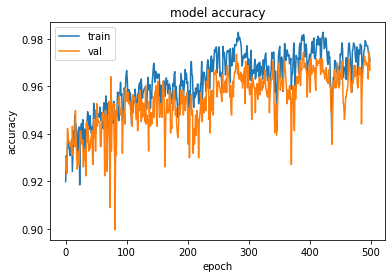

In [73]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

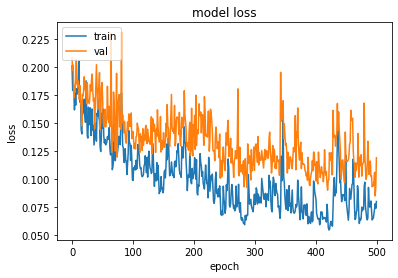

In [74]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [75]:
model.evaluate(x_test,y_test,verbose=2)

1320/1 - 1s - loss: 0.0679 - accuracy: 0.9621


[0.1329362005573895, 0.9621212]

In [76]:
model.save("Musk&non-muskClassification.h5")

In [77]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [78]:
yhat_probs = model.predict(x_test, verbose=0)

yhat_classes = model.predict_classes(x_test, verbose=0)

In [79]:
yhat_probs = yhat_probs[:, 0]
yhat_classes = yhat_classes[:, 0]

In [80]:
precision = precision_score(y_test, yhat_classes)
precision

0.9081081081081082

In [81]:
recall = recall_score(y_test, yhat_classes)
recall

0.835820895522388

In [82]:
f1 = f1_score(y_test, yhat_classes)
f1

0.8704663212435234

In [83]:
accuracy = accuracy_score(y_test, yhat_classes)
accuracy

0.9621212121212122